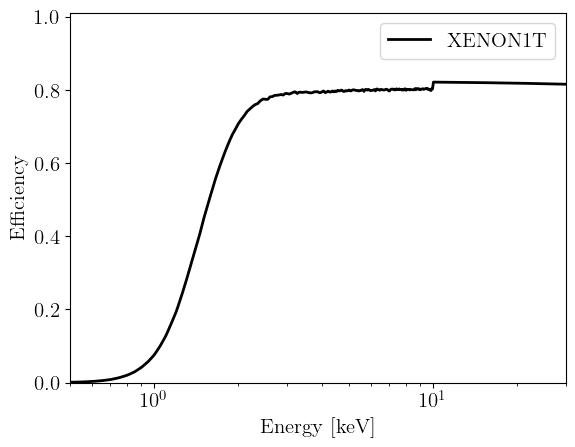

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
from scipy import interpolate
from matplotlib import rc

plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')

efficiency = np.loadtxt("XENONnT/efficiency.txt")
# efficiency = np.loadtxt("XENON1T/Efficiency.dat")
x1, y1 = efficiency[:, 0], efficiency[:, 1]
epsilon = interpolate.interp1d(x1*1.e3, y1, fill_value=(0,0.815), bounds_error=False)

plt.plot(x1, y1, color='black', linewidth=2, linestyle="-",  label=r"${\rm XENONnT}$")
plt.xlabel(r"${\rm Energy~[keV]}$", fontsize=15)
plt.ylabel(r"${\rm Efficiency}$", fontsize=15)
plt.xlim(5e-1, 30)
plt.ylim(0.0, 1.01)
plt.xscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.show()

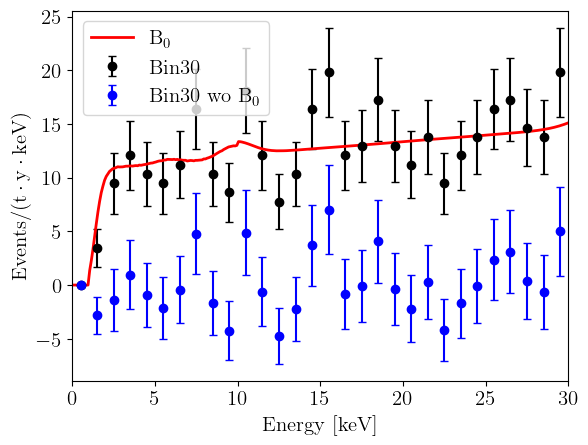

In [8]:
bkg = np.loadtxt("XENONnT/bkg_model.txt")
x2, y2 = bkg[:, 0], bkg[:, 1]
background = interpolate.interp1d(x2, y2, fill_value=(0, 0), bounds_error=False)

events = np.loadtxt("XENONnT/data_unbinned_1to30kev.txt")  # exposure of 1.16 tonne*years

bin30 = np.linspace(0, 30, 31)  # 30 bins => 31 bin edges
count30, bin30_edges = np.histogram(events, bin30) # Create histogram and get counts per bin
bin30_centers = 0.5 * (bin30_edges[:-1] + bin30_edges[1:])
err30 = np.sqrt(count30) # Statistical error bars (Poisson): sqrt(N)
# err30 = np.where(count30 == 0, 1.841, np.sqrt(count30))  # Neil Gehrels(1986) recommended err=1.841 when N=0

# Stack the three arrays column-wise
output_data = np.column_stack((bin30_centers, count30/1.16, err30/1.16))
np.savetxt("XENONnT/data_bin30.txt", output_data, fmt="%.10e\t%.10e\t%.10e")
output_data2 = np.column_stack((bin30_centers, count30/1.16 - background(bin30_centers), err30/1.16))
np.savetxt("XENONnT/data_bin30_wo_bkg.txt", output_data2, fmt="%.10e\t%.10e\t%.10e")

plt.errorbar(bin30_centers, count30/1.16, yerr=err30/1.16, fmt='o', color='black', capsize=3, label=r'${\rm Bin30}$')
plt.errorbar(bin30_centers, count30/1.16- background(bin30_centers), yerr=err30/1.16, fmt='o', color='blue', capsize=3, label=r'${\rm Bin30~wo~B_0}$')

plt.plot(x2, y2, color='red', linewidth=2, linestyle="-",  label=r"${\rm B_0}$")
plt.xlabel(r"${\rm Energy~[keV]}$", fontsize=15)
plt.ylabel(r"${\rm Events/(t\cdot y\cdot keV)}$", fontsize=15)
plt.xlim(0.0, 30)
# plt.ylim(0.0, 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

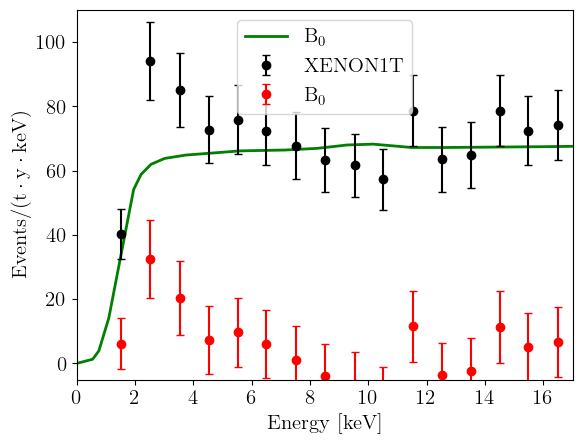

In [ ]:
bkg = np.loadtxt("XENON1T/Central.dat")
x2, y2 = bkg[:, 0], bkg[:, 1]

lx, ly = np.loadtxt("XENON1T/Lower.dat", unpack=True)
ux, uy = np.loadtxt("XENON1T/Upper.dat", unpack=True)
err = (uy - ly)/2.0

tbkg = np.loadtxt("XENON1T/bkg.dat")
xbkg, ybkg = tbkg[:, 0], tbkg[:, 1]
background = interpolate.interp1d(xbkg, ybkg, fill_value=(0, 0), bounds_error=False)
plt.plot(xbkg, ybkg, color='green', linewidth=2, linestyle="-",  label=r"${\rm B_0}$")

output_data2 = np.column_stack((x2, y2-background(x2), err))
np.savetxt("XENON1T/data_bin_wo_bkg.dat", output_data2, fmt="%.10e\t%.10e\t%.10e")

plt.errorbar(x2, y2, yerr=err, fmt='o', color='black', capsize=3, label=r'${\rm XENON1T}$')
plt.errorbar(x2, y2-background(x2), yerr=err, fmt='o', color='red', capsize=3, label=r"${\rm B_0}$")
plt.xlabel(r"${\rm Energy~[keV]}$", fontsize=15)
plt.ylabel(r"${\rm Events/(t\cdot y\cdot keV)}$", fontsize=15)
plt.xlim(0.0, 17)
plt.ylim(-5, 110)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

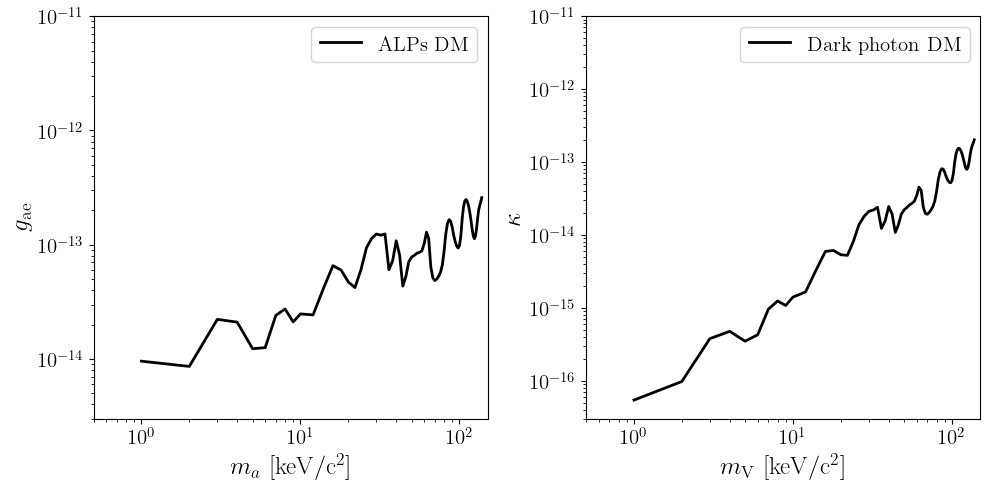

In [4]:
bdm = np.loadtxt("XENONnT/bdm_limits.txt")
x4, y4, yy4 = bdm[:, 0], bdm[:, 1], bdm[:, 2]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(x4, y4, color='black', linewidth=2, linestyle="-",  label=r"${\rm ALPs~DM}$")
axs[0].set_xlabel(r"$ m_a~{\rm [keV/c^2]}$", fontsize=18)
axs[0].set_ylabel(r"$g_{\rm ae}$", fontsize=18)
axs[0].set_xlim(0.5, 150)
axs[0].set_ylim(3e-15, 1e-11)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].tick_params('x', labelsize=15)
axs[0].tick_params('y', labelsize=15)
axs[0].legend(fontsize=15)

axs[1].plot(x4, yy4, color='black', linewidth=2, linestyle="-",  label=r"${\rm Dark~photon~DM}$")
axs[1].set_xlabel(r"$ m_{\rm V}~{\rm [keV/c^2]}$", fontsize=18)
axs[1].set_ylabel(r"$\kappa$", fontsize=18)
axs[1].set_xlim(0.5, 150)
axs[1].set_ylim(3e-17, 1e-11)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].tick_params('x', labelsize=15)
axs[1].tick_params('y', labelsize=15)
axs[1].legend(fontsize=15)

plt.tight_layout()
plt.show()

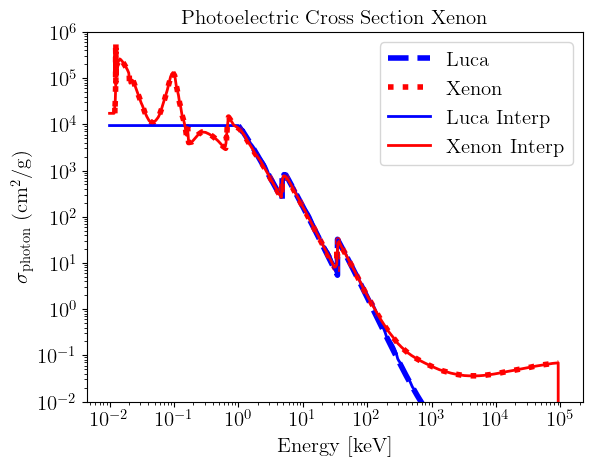

In [5]:
# photoelectric cross section in cm^2/g vs energy in keV
fs = "/Users/yuangw/Documents/GitHub/chameleons/2103.15834/data/sigmaevsE.txt"
EMeV, sigma1 = np.loadtxt(fs, dtype='f8', delimiter = ',', usecols=(0,1), unpack=True)
sigmae1 = interpolate.interp1d(EMeV*1.e3, sigma1, fill_value=(sigma1[0],0), bounds_error=False)

# Photon absorption cross section for xenon in Mbarn vs energy in kev
sigma_xenon = np.loadtxt("XENONnT/xenon_cross_sec.csv")
EKeV, sigma2 = sigma_xenon[:, 0], sigma_xenon[:, 1]*4.5868e3  #4.5868e3 convert xenon Mbarn to cm^2/g
sigmae2 = interpolate.interp1d(EKeV, sigma2, fill_value=(sigma2[0],0), bounds_error=False)

plt.plot(EMeV*1.e3, sigma1, color='blue', linewidth=4, linestyle='--', label=r'${\rm Luca}$')
plt.plot(EKeV, sigma2, color='red',linewidth=4, linestyle=':',  label=r'${\rm Xenon}$')

ene = np.logspace(-2, 5, 400)
plt.plot(ene, sigmae1(ene), color='blue', linewidth=2, linestyle='-', label=r'${\rm Luca~Interp}$')
plt.plot(ene, sigmae2(ene), color='red', linewidth=2, linestyle='-',  label=r'${\rm Xenon~Interp}$')
plt.xlabel(r"${\rm Energy ~{[keV]}}$", fontsize=15)
plt.ylabel(r"$\sigma_{\rm photon}~({\rm cm^2 /g})$", fontsize=15)
plt.title(r"${\rm Photoelectric~Cross~Section~Xenon}$", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(1e-2, 1e6)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=15)
plt.show()